<a href="https://colab.research.google.com/github/deynabaevax/groupm-graduation/blob/developing/code/eda/eda_jumbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 
### Jumbo Data

### Import the libraries

In [45]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import pandas as pd
import numpy as np
import re
import string
import emoji

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import the data set

In [47]:
df = pd.read_excel("/content/drive/MyDrive/datasets/jumbo-data.xlsx")

In [48]:
df.head()

,Case Number,Case Description,Case Origin
0,3349414.0,Mijn vrouw had wat van deze noten in haar kwar...,Web
1,4438158.0,klacht over baas en bazin winkel.,Phone
2,4561261.0,"Dag, ik had een probleem met mijn bestelling v...",WhatsApp
3,4378916.0,Beste heer mevrouw Inmiddels zijn we 3 maanden...,WhatsApp
4,4438325.0,"Hallo, staan er voedingswaarden vermeld op de ...",WhatsApp


In [49]:
# rename the columns for easy typing
df.rename(columns={"Case Number": "id", "Case Description": "descr", "Case Origin": "source"}, inplace=True)

## Data Profiling

In [50]:
df.shape

(95922, 3)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95922 entries, 0 to 95921
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      95913 non-null  float64
 1   descr   95917 non-null  object 
 2   source  95913 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,95913.0,4.499588e+06,107767.322268,1703086.0,4417906.0,4500319.0,4585739.0,4670184.0


In [53]:
# check for duplicates in the 'descr' column
duplicates = df.duplicated(subset=["id" ,"descr"])
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 4


In [54]:
df.isnull().sum()

id        9
descr     5
source    9
dtype: int64

In [55]:
# create a boolean mask of null values
mask = df.isnull().any(axis=1)

# select the rows that have at least one null value
rows_with_null = df[mask]

# print the selected rows
print(rows_with_null)

              id                                              descr  source
27726  4503153.0                                                NaN  E-mail
60314        NaN  ? 1070 Bruxelles / Brussel [cid:image002.png@0...     NaN
92512        NaN                                                NaN     NaN
92513        NaN  Here you can find the after-movie of last year...     NaN
92514        NaN                                                NaN     NaN
92515        NaN  Best regards, Florian Hello Jumbo Marketing Te...     NaN
92516        NaN                                                NaN     NaN
92517        NaN  Here you can find the after-movie of last year...     NaN
92518        NaN                                                NaN     NaN
92519        NaN  Best regards, Florian Hi you're chatting with ...     NaN


In [56]:
data = df.dropna()

In [57]:
data.shape

(95912, 3)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 95921
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      95912 non-null  float64
 1   descr   95912 non-null  object 
 2   source  95912 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [59]:
data["source"].unique()

array(['Web', 'Phone', 'WhatsApp', 'E-mail', 'Telefoon', 'Twitter',
       'Letter', 'Facebook', 'Customer - Chat'], dtype=object)

### Visualize from which source are the most ocurring queries.

<Axes: xlabel='source', ylabel='count'>

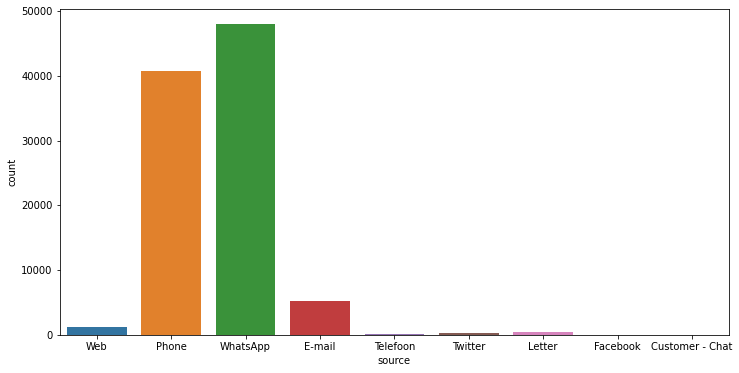

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x="source", data=data)

In [61]:
counts = data["source"].value_counts()
counts

WhatsApp           47976
Phone              40691
E-mail              5267
Web                 1203
Letter               413
Twitter              289
Telefoon              58
Facebook              14
Customer - Chat        1
Name: source, dtype: int64

### Explore the text distribution

In [65]:
data["text_length"] = data["descr"].astype(str).apply(len)
data["text_word_count"] = data["descr"].apply(lambda x: len(str(x).split()))

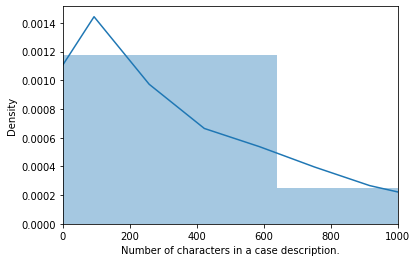

In [70]:
# plot the length of the characters in a case query
sns.distplot(data["text_length"])
plt.xlim([0, 1000]);
plt.xlabel("Number of characters in a case description.");

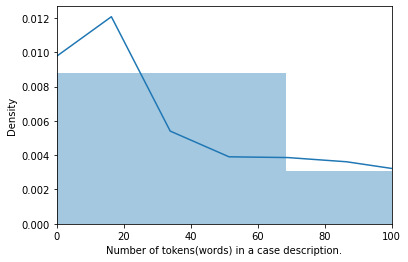

In [69]:
# plot the number of words in a case query
sns.distplot(data["text_word_count"])
plt.xlim([0, 100]);
plt.xlabel("Number of tokens(words) in a case description.");